<img style="float: left; width: 260px;" src="images/shutterstock_318255209.jpg">
***
## <font color="grey"> $\quad$ Mutation rates in BRAF and NRAS melanoma</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\mathrm{minimize}\quad}$
$\newcommand{\maximize}{\mathrm{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\conv}{\operatorname{conv}}$
$\newcommand{\inter}{{\operatorname{int}}}$

---
## <font color="grey">  1. Preliminaries</font>
---

We make the assumption that mutations accounted for by Signature 1 (or Signature 1 + Signature 5) accumulate at a constant rate over time ([Alexandrov et al](http://www.nature.com/ng/journal/v47/n12/full/ng.3441.html)).

### <font color="grey">  1.1. Mutation signatures</font>

The mutation alphabet $\Theta$ we consider consists of single nucleotide substitutions in trinucleotide context (or example, ATC $\rightarrow$ AGC). The subsitution considered are from Cytosine and Thymine to one of the three other bases, making 6 possible subsitutions in $4\times 4=16$ contexts. The alphabet thus consists of $K=96$ elements. A **mutation catalog** $\vct{m}\in \R^K$ consists of the number of times (per gigabase pair) each of the substitutions occurs within a sample. According to [Alexandrov et al](http://www.nature.com/nature/journal/v500/n7463/full/nature12477.html), a mutation catalog can be written as non-negative linear combination

\begin{equation*}
  \vct{m} = \sum_{i=1}^N e_i \vct{p}_i,
\end{equation*}

where the $\vct{p}_i\in \R^K$ are probability distributions on the alphabet $\Theta$, called **mutation signatures**. It was shown by [Alexandrov et al](http://www.nature.com/nature/journal/v500/n7463/full/nature12477.html) that the mutation catalogs of many cancer types can be expressed using a small number $N$ of signatures. A catalog of mutation signatures can be found in the [COSMIC Database](http://cancer.sanger.ac.uk/cosmic). Of interest in Melanoma are signatures $1$, $5$ and $7$ from this database, pictured below.

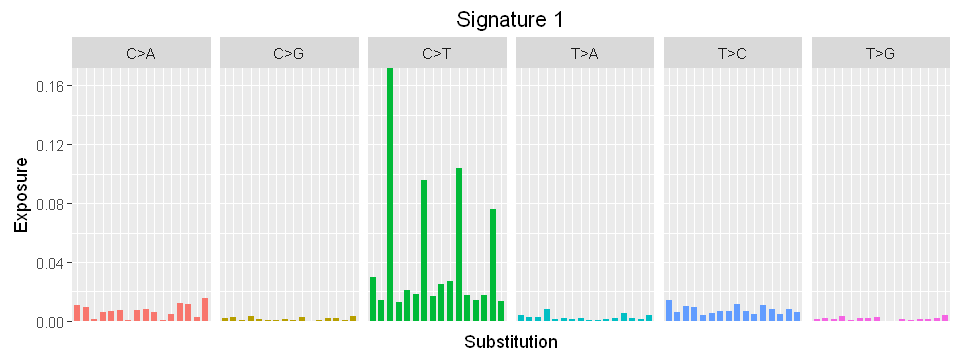

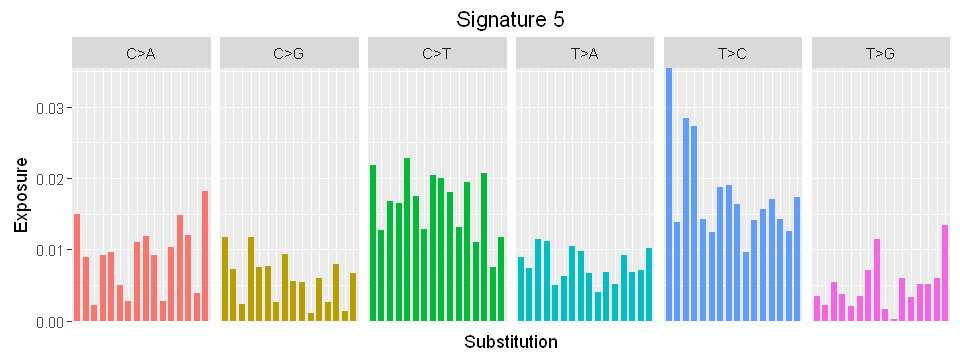

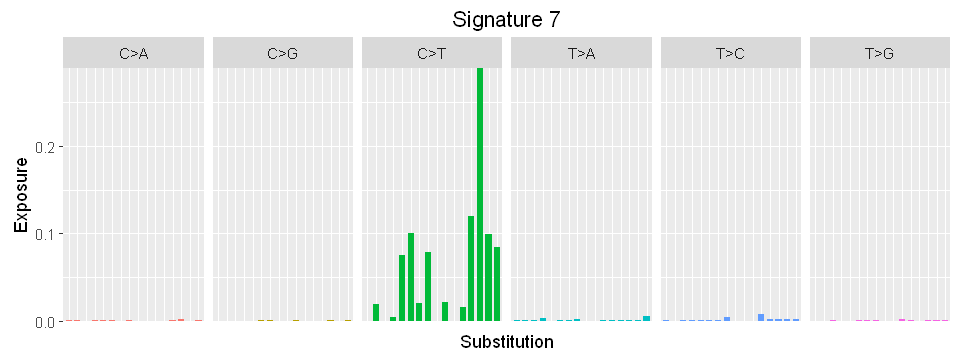

In [42]:
library(ggplot2)
all_sigs <- read.csv('data/signatures_probabilities.txt', sep="\t")
# Do some preformating for plot
all_sigs$Context <- paste(substr(all_sigs$Trinucleotide, 1, 1), substr(all_sigs$Trinucleotide, 3, 3), sep='')
# This is only because we're using Jupyter notebook
library(repr)
options(repr.plot.width=8, repr.plot.height=3)
# Sig 1
ggplot(data=all_sigs, aes(x=Context, y=Signature.1)) +
    geom_bar(stat="identity", aes(fill=Substitution.Type), width=0.7) + facet_wrap(~ Substitution.Type, ncol=6) +
    xlab("Substitution") + ylab("Exposure") +  guides(fill=FALSE) + ggtitle("Signature 1") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + scale_y_continuous(expand = c(0,0))
# Sig 5
ggplot(data=all_sigs, aes(x=Context, y=Signature.5)) +
    geom_bar(stat="identity", aes(fill=Substitution.Type), width=0.7) + facet_wrap(~ Substitution.Type, ncol=6) +
    xlab("Substitution") + ylab("Exposure") +  guides(fill=FALSE) + ggtitle("Signature 5") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + scale_y_continuous(expand = c(0,0))
# Sig 7
ggplot(data=all_sigs, aes(x=Context, y=Signature.7)) +
    geom_bar(stat="identity", aes(fill=Substitution.Type), width=0.7) + facet_wrap(~ Substitution.Type, ncol=6) +
    xlab("Substitution") + ylab("Exposure") +  guides(fill=FALSE) + ggtitle("Signature 7") +
    theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) + scale_y_continuous(expand = c(0,0))

The number of mutations (SNVs) attributed to a signature $\vct{p}_i$ is $[e_i\vct{p}_i]$. Mutations attributable to Signatures 1 and Signature 5 appear to accumulate at a constant rate over time in some cancers ([Alexandrov et al](http://www.nature.com/ng/journal/v47/n12/full/ng.3441.html)), while Signature 7 has been linked to UV exposure. In our Melanoma samples, only Signatures 1, 5 and 7 have a significant presence. To derive the exposure, we compute a non-negative least squares

\begin{equation*}
  \underset{\vct{e}\geq \zerovct}{\minimize}\norm{\vct{m}-\mtx{P}\vct{e}}^2,
\end{equation*}

where $\mtx{P}=[\vct{p}_1,\dots,\vct{p}_N]$ and $\vct{e}=(e_1,\dots,e_N)^{\trans}$. I'm not sure whether it's a good idea to do some bootstrap resampling here: normalize $\tilde{\vct{m}} = \vct{m}/(\sum_i m_i)$, then resample a number of vectors $\vct{m}$ from this discrete probability distribution and compute the exposures, finally average these. **TODO** Look at a refined way of extracting signatures.

Out of cursioty, we look at the C>T transpositions in signatures 1 and 7 in more detail.

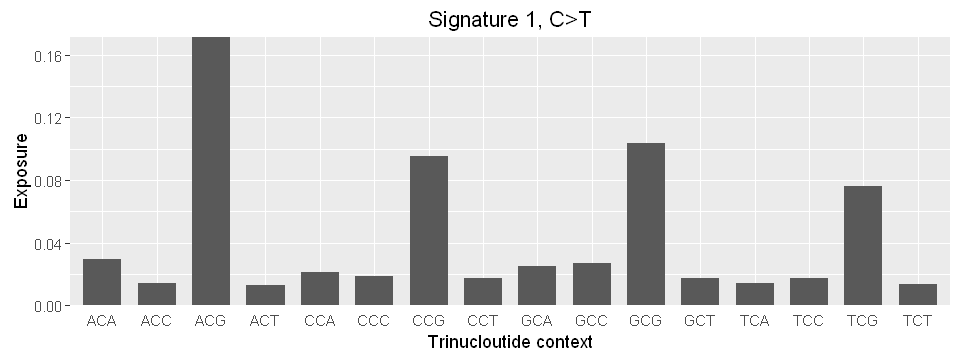

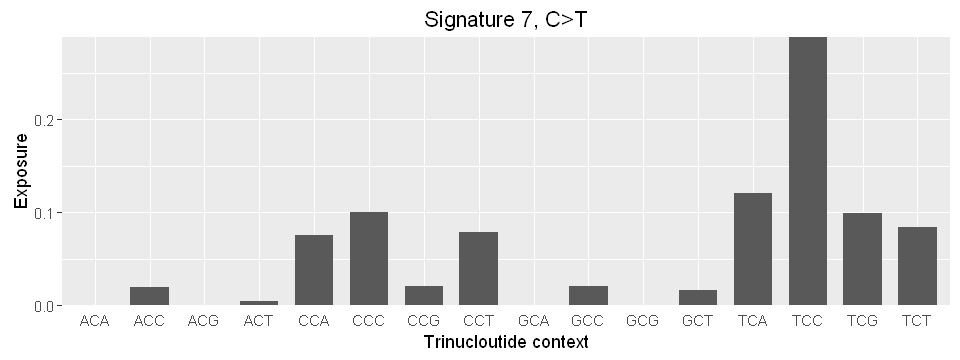

In [43]:
ct <- subset(all_sigs, Substitution.Type == "C>T")
ggplot(data=ct, aes(x=Trinucleotide, y=Signature.1)) +
    geom_bar(stat="identity", width=0.7) +
    xlab("Trinucloutide context") + ylab("Exposure") +  guides(fill=FALSE) + ggtitle("Signature 1, C>T") +
    theme(axis.ticks.x=element_blank()) + scale_y_continuous(expand = c(0,0))
ggplot(data=ct, aes(x=Trinucleotide, y=Signature.7)) +
    geom_bar(stat="identity", width=0.7) +
    xlab("Trinucloutide context") + ylab("Exposure") +  guides(fill=FALSE) + ggtitle("Signature 7, C>T") +
    theme(axis.ticks.x=element_blank()) + scale_y_continuous(expand = c(0,0))

### <font color="grey">  1.2. Datasets</font>

We use data from the [TCGA SKCM](https://gdc-portal.nci.nih.gov/projects/TCGA-SKCM) database. The specific prepared files are from the supplementary material to [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064) and from a file provided by Amaya and Simon. The data is loaded an prepared using an external script, which prepares a data frame including most of the information from the [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064), enhanced with the SNV calls and BRAF/NRAF classification provided by Amaya and Simon. Eventually one might want to try out more datasets. **TODO** Get larger datasets.

In [44]:
# Load data using external script
source('prepare.R')
dim(data)

[1] 196  25

The variables **age_at_diagnosis**, **breslow**, **sig1**, **sig5**, **sig7**, **totalNonUV**, **totalSNV** are quantitative, the variables **gender** (2), **clark_level** (5), **ulceration** (2), **tissue_source_site** (12), **body_area** (4), **rgeno** (6), **Cohort** (2) are categorial, and **V60L**, **D84E**, **V92M**, **R142H**, **R151C**, **I155T**, **R160W**, **R163Q**, **D294H**, **other.rscore** are ordinal with three levels (0,1,2).

### <font color="grey">  1.3. Melanocyte proliferation and other information</font>

Based on [Tomasetti and Vogelstein](http://science.sciencemag.org/content/347/6217/78), melanocytes divide every $\sim 147$ days, or $2.48$ times per year. Moreover, Tomasetti and Vogelstein assume that melanocytes are stem cells. I found other interesting information in [Cichorek et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3834696/), [Whiteman et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3395885/), [Zabierowski et al](https://www.ncbi.nlm.nih.gov/pubmed/21410654), [Hoek and Goding](https://www.ncbi.nlm.nih.gov/pubmed/20726948), and [Schatton and Frank](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885609/). **TODO** Make sense of all of this.

### <font color="grey">  1.4. Goals</font>

The way I understand it, we want to find evidence that melanoma with NRAS mutations and with BRAF mutation have different cells of origin. I assume that we would want to find reasonably good estimates for the proliferation rates from the data. This needs a good model for the process through which mutations accumulate. To interpret the result, we need some kind of information about the possible types of cell where melanoma may originate (see previous paragraph).

---
## <font color="grey">  2. Initial exploration </font>
---

In this section we merely verify that there **is** a difference between the BRAF and the NRAS samples. The exact nature of this difference will be explored in the next section.
We begin with a naive regression of the exposure to signature 1 against age. Looking at some plots gives some indication that robust regression (which is more insensitive to outliers) may provide some information. Here we look at Signature 1+5, Signature 7, totalNonUV, and totalSNV from the datasets, againts age.

In [45]:
library(MASS)
library(robustbase)

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 14 rows containing missing values (geom_point)."

Warning message:
"Removed 21 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 21 rows containing missing values (geom_point)."

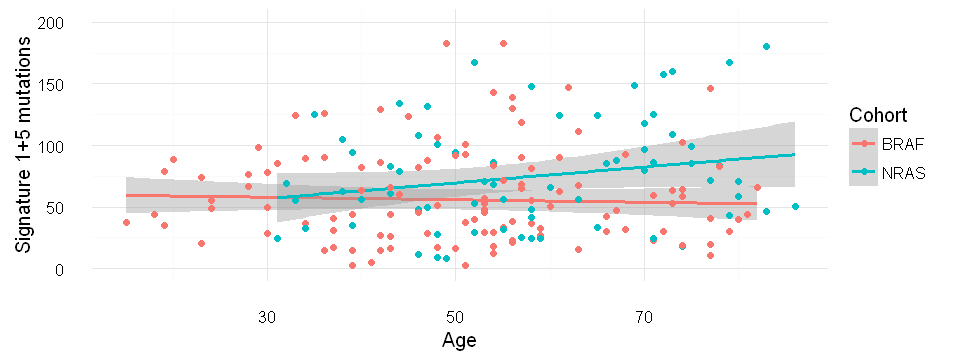

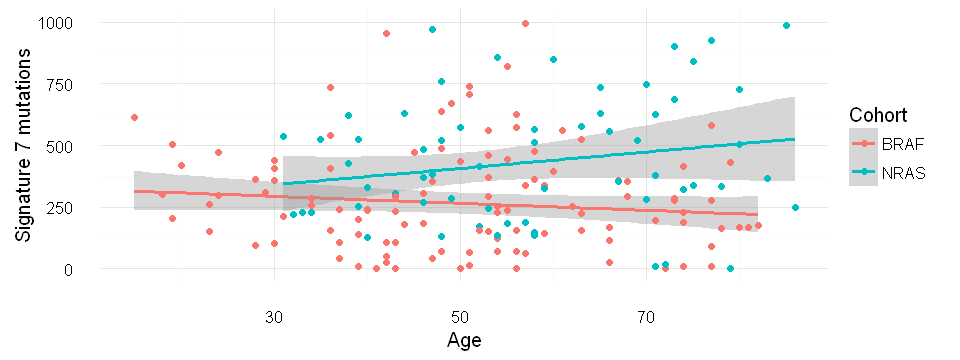

In [46]:
ggplot(data, aes(age_at_diagnosis, sig1+sig5, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("Signature 1+5 mutations") + scale_y_continuous(limits = c(0,200)) + theme_minimal()
ggplot(data, aes(age_at_diagnosis, sig7, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("Signature 7 mutations") + scale_y_continuous(limits = c(0,1000)) + theme_minimal()

We now plot the robust regression lines for the totalNonUV column in the dataset (not sure what this represents exactly). The result looks much cleaner.

Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 12 rows containing missing values (geom_point)."

Warning message:
"Removed 22 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 22 rows containing missing values (geom_point)."

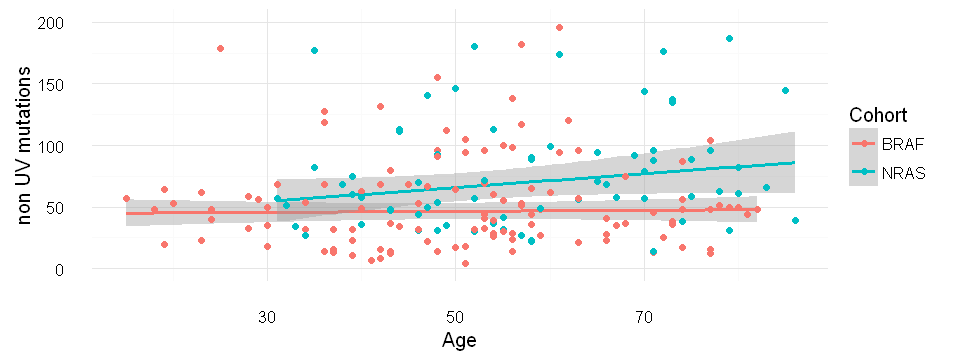

Warning message:
"Removed 26 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 26 rows containing missing values (geom_point)."

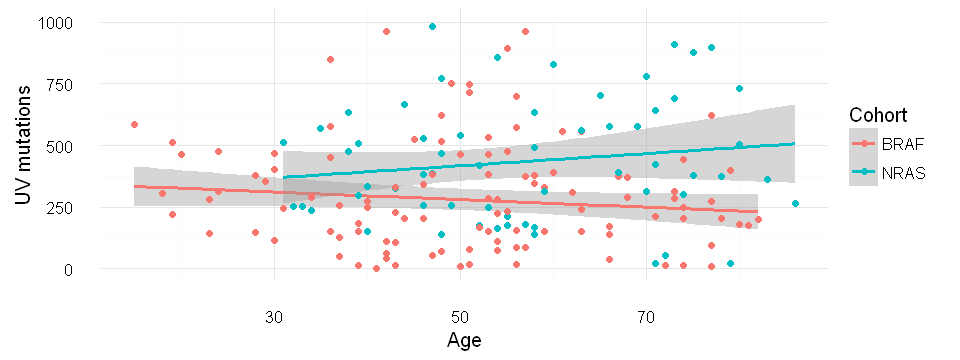

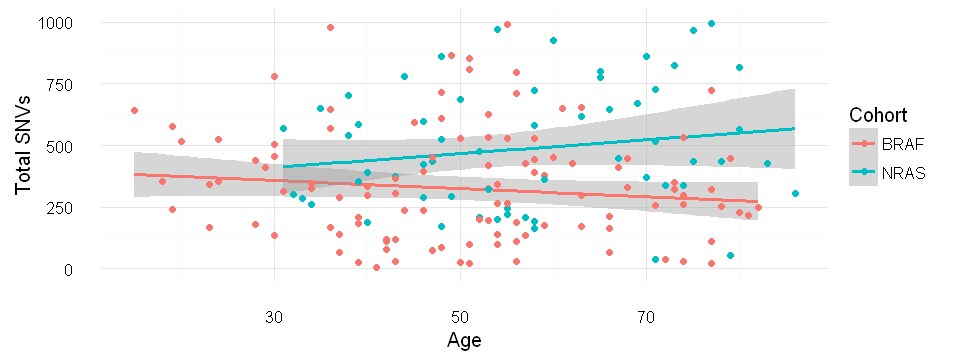

In [47]:
ggplot(data, aes(age_at_diagnosis, totalNonUV, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("non UV mutations") + scale_y_continuous(limits = c(0,200)) +
    theme_minimal()
ggplot(data, aes(age_at_diagnosis, totalSNV-totalNonUV, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("UV mutations") + scale_y_continuous(limits = c(0,1000)) +
    theme_minimal()
ggplot(data, aes(age_at_diagnosis, totalSNV, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("Total SNVs") + scale_y_continuous(limits = c(0,1000)) +
    theme_minimal()

In the NRAS samples, the model does not seem to fit very well (maybe not enough data). In the BRAF example, the intercept is statistically significant, while the slope is not. Before going into more detail, we first check whether a linear model is a good way to model this data in the first place. For this, we compare the quantiles of the residuals with those of the normal distribution using a Q-Q plot.

Do a Q-Q plot to compare the quantiles of the residuals with those of the normal distribution. This is a type of visual goodness-of-fit test, if the model was adequate, we would see a straight line. If the 

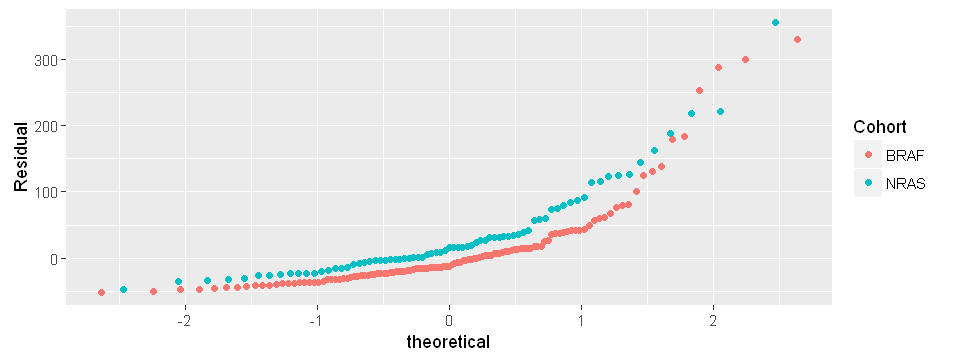

In [48]:
rres <- lmrob(totalNonUV ~ age_at_diagnosis, data = data)
ggplot(data = data, aes(sample = rres$residuals)) + stat_qq(aes(color=Cohort)) + ylab("Residual")

The shape indicates that the residuals are right-skewed. While the results of this simple robust linear regression are not very useful, they show, at least, a difference between the exposure to signature 1 in NRAS and BRAF samples. A different regression model, using the logarithms of the number of mutations, may be more appropriate.

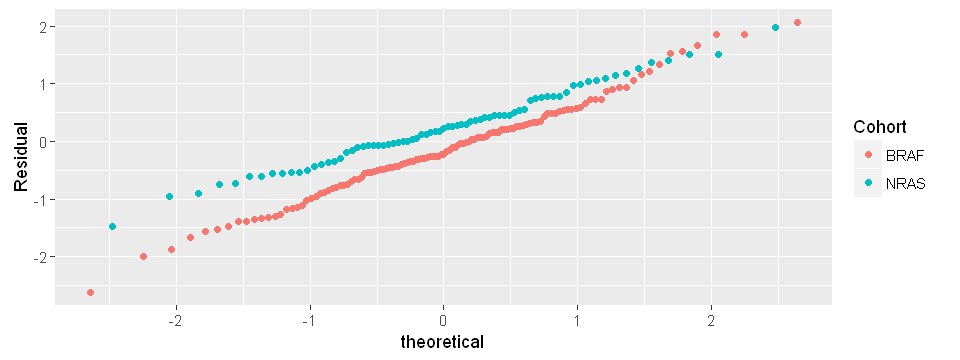

In [49]:
rres.log <- lmrob(log(totalNonUV) ~ age_at_diagnosis, data = data)
ggplot(data, aes(sample = rres.log$resid, color = Cohort)) + stat_qq() + ylab("Residual")

Now this looks better, and it suggests that mutations accumulate according to an exponential rule within a reasonable age range.

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

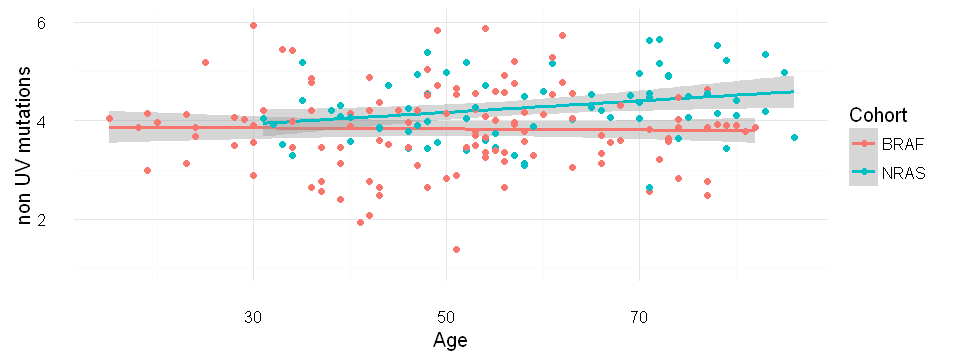

In [50]:
ggplot(data, aes(age_at_diagnosis, log(totalNonUV), color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("non UV mutations") + scale_y_continuous(limits = c(1,6)) + theme_minimal()

Note that the plot was clipped, it doesn't show some of the outliers. Based on this picture, we make a robust regression of the logarithms of the total non UV mutations against age and see if the difference between the two cohorts is significant.

In [51]:
rres.cohort <- lmrob(log(totalNonUV) ~ age_at_diagnosis + Cohort, data = data)
summary(rres.cohort)


Call:
lmrob(formula = log(totalNonUV) ~ age_at_diagnosis + Cohort, data = data)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-2.44847 -0.45761 -0.01069  0.45792  2.17749 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.653310   0.177746  20.554  < 2e-16 ***
age_at_diagnosis 0.003558   0.002982   1.193 0.234349    
CohortNRAS       0.417979   0.109117   3.831 0.000173 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 0.7374 
Multiple R-squared:  0.08066,	Adjusted R-squared:  0.07113 
Convergence in 10 IRWLS iterations

Robustness weights: 
 18 weights are ~= 1. The remaining 178 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2477  0.8640  0.9461  0.8972  0.9877  0.9990 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.0

It appears that in this model, the cohort is highly significant. This merits looking at the effect of removing this variable, and at the two models separately.

In [52]:
# Test difference of the residuals of both models using a $\chi^2$ test
anova(rres.log, rres.cohort)

,pseudoDf,Test.Stat,Df,Pr(>chisq)
1,193,NA,NA,NA
2,1.940000e+02,1.467313e+01,1.000000e+00,1.278558e-04


**TODO** Add more goodness-of-fit techniques.

This looks good. Finally, we look at the subsets of NRAS and BRAF samples separately.

In [53]:
rres.braf <- lmrob(log(totalNonUV) ~ age_at_diagnosis, data = subset(data, Cohort=="BRAF"))
rres.nras <- lmrob(log(totalNonUV) ~ age_at_diagnosis, data = subset(data, Cohort=="NRAS"))
summary(rres.braf)
summary(rres.nras)


Call:
lmrob(formula = log(totalNonUV) ~ age_at_diagnosis, data = subset(data, Cohort == 
    "BRAF"))
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-2.45011 -0.46596  0.05363  0.39980  2.07914 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.889811   0.214646  18.122   <2e-16 ***
age_at_diagnosis -0.001047   0.003713  -0.282    0.778    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 0.7776 
Multiple R-squared:  0.0004444,	Adjusted R-squared:  -0.007955 
Convergence in 9 IRWLS iterations

Robustness weights: 
 12 weights are ~= 1. The remaining 109 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3000  0.8538  0.9473  0.8921  0.9869  0.9985 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol     


Call:
lmrob(formula = log(totalNonUV) ~ age_at_diagnosis, data = subset(data, Cohort == 
    "NRAS"))
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-1.79177 -0.39931  0.01097  0.42423  1.73313 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.599473   0.273280  13.171   <2e-16 ***
age_at_diagnosis 0.011709   0.004786   2.446   0.0168 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 0.6622 
Multiple R-squared:  0.06822,	Adjusted R-squared:  0.05545 
Convergence in 8 IRWLS iterations

Robustness weights: 
 8 weights are ~= 1. The remaining 67 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4442  0.8718  0.9554  0.9066  0.9863  0.9987 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol         solve

The conclusion here is that regressing the logarithm of the number of non UV samples against the age gives approximately the same intercept for NRAS and BRAF samples (around $3.6$ to $3.9$), but a significant slope of $0.01$ for NRAS and no slope for BRAF.

---
## <font color="grey">  3. Models </font>
---

In this section we consider a selection of models for the accumulation of somatic mutations in a cancer genome. The models should eventually be validated both statistically and through a plausible explanation. Ultimately, we do not only want to estimate the parameters of the model that describes the accumulation of mutations over time, but also relate these parameters to cell division rate.

## <font color="grey">  3.1 Homogeneous Poisson counting process </font>

The idea is that at each time (age) interval $\Delta t$, the number of mutations $N(t+\Delta t)-N(t)$ follows a Poisson distribution with parameter $\Delta t \lambda$. In particular, at time $t$,

\begin{equation*}
  \mtx{P}\{ N(t) = n\} = e^{-\lambda t}\frac{(\lambda t)^n}{n!}, \quad \mtx{E}[N(t)] = \lambda t.
\end{equation*}

In particular, the **ratio** $N(t)/t$ follows a Poisson distribution with rate $\lambda$. In fact, if we plot the histogram of this ratio, it does appear to follow Poisson distribution (with fat tails due to outliers).

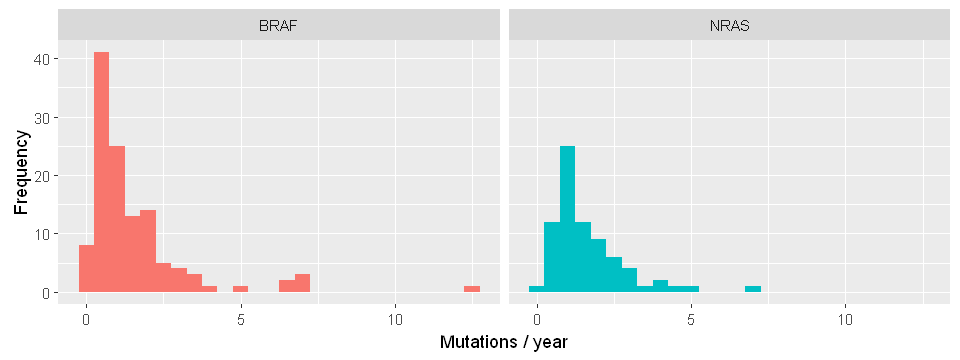

In [54]:
ggplot(data, aes(totalNonUV/age_at_diagnosis, fill=Cohort)) +
    geom_histogram(binwidth = 0.5, position="dodge") + guides(fill=FALSE) +
    facet_wrap(~ Cohort, ncol=2) + xlab("Mutations / year") + ylab("Frequency")

For the mean values we have the following box plots.

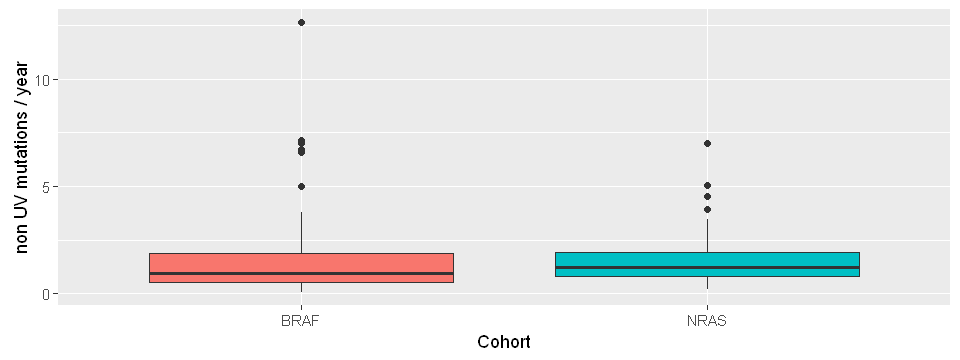

In [55]:
ggplot(data, aes(Cohort, totalNonUV/age_at_diagnosis, fill=Cohort)) +
    geom_boxplot() + ylab("non UV mutations / year") + guides(fill=FALSE)

Alternatively, we can try modeling this ratio with a negative binomial distribution, which is suitable in cases where one would normally use the Poisson distribution, but where the variance exceeds the mean. In our case, the mean and variance are given as follows.

In [56]:
with(data, tapply(totalNonUV/age_at_diagnosis, Cohort, function(x) {
  sprintf("Mean (Var) = %1.2f (%1.2f)", mean(x), sd(x)**2)
}))

BRAF                       NRAS 
"Mean (Var) = 1.53 (3.19)" "Mean (Var) = 1.61 (1.40)"

We first try a Poisson regression. This is a generalized linear model (GLM) where the dependent variable $N$ is a count variable, and depends on the covariates $X_i$ via

\begin{equation*}
  \log(E[N\ | \ \mtx{X}]) = \log(t) + \beta_0+\sum_{i=1}^p \beta_i X_i.
\end{equation*}

The $\log(t)$ term is the *exposure*: if we bring it to the left-hand side of the equation we get a model for the ratio $Y/t$. As candidates for the covariates we can take any of the available variables, but we should choose ones for which we have enough data. Here is the list.

In [57]:
# Count number of NA in each column
sapply(data, function(x) round(100*sum(is.na(x))/dim(data)[1]))

age_at_diagnosis            breslow             gender        clark_level 
                 0                 24                  0                 28 
        ulceration tissue_source_site          body_area        tissue_type 
                35                  0                 12                  0 
            Cohort               V60L               D84E               V92M 
                 0                  0                  0                  0 
             R142H              R151C              I155T              R160W 
                 0                  0                  0                  0 
             R163Q              D294H       other.rscore              rgeno 
                 0                  0                  0                  0 
              sig1               sig5               sig7         totalNonUV 
                 0                  0                  0                  0 
          totalSNV 
                 0

As there is too much missing in **ulceration**, **breslow**, and **clark_level**, we omit them from the analysis. For the remaining variables, we get rid of the samples with missing data. **TODO** do some clever imputing using MICE or similar package.

Before dealing with more covariates, we first try a very simple model that only considers age and cohort.

In [58]:
res.poisson <- glm(totalNonUV ~ offset(log(age_at_diagnosis)) + Cohort + rgeno, data = data, family="poisson")
summary(res.poisson)


Call:
glm(formula = totalNonUV ~ offset(log(age_at_diagnosis)) + Cohort + 
    rgeno, family = "poisson", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-12.454   -5.361   -2.325    2.566   30.649  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.02878    0.02237   1.287 0.198233    
CohortNRAS   0.20938    0.01678  12.480  < 2e-16 ***
rgenor,0    -0.10287    0.02867  -3.589 0.000332 ***
rgenoR,0     0.38846    0.02621  14.819  < 2e-16 ***
rgenor,r     0.13091    0.03333   3.928 8.56e-05 ***
rgenoR,r     0.53196    0.02776  19.163  < 2e-16 ***
rgenoR,R     0.56943    0.03041  18.723  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10381  on 195  degrees of freedom
Residual deviance:  9284  on 189  degrees of freedom
AIC: 10446

Number of Fisher Scoring iterations: 5


Now divide the data set according to 'rgeno' and 'Cohort' status and estimate the Poisson parameter.

In [80]:
res_nras.poisson <- glm.nb(totalNonUV ~ offset(log(age_at_diagnosis)) + rgeno + gender, data = subset(data, Cohort=="NRAS"), link=log)
lambda_nras <- coef(res_nras.poisson)["(Intercept)"]
res_braf.poisson <- glm(totalNonUV ~ offset(log(age_at_diagnosis)) + rgeno + gender, data = subset(data, Cohort=="BRAF" & age_at_diagnosis < 60), family="poisson")
lambda_braf <- coef(res_braf.poisson)["(Intercept)"]
exp(lambda_nras)/exp(lambda_braf)

(Intercept) 
   1.198156

In [81]:
print=data.frame(subset(data, Cohort=="BRAF" & age_at_diagnosis < 60),pred=res_braf.poisson$fitted)
print

,age_at_diagnosis,breslow,gender,clark_level,ulceration,tissue_source_site,body_area,tissue_type,Cohort,V60L,...,R163Q,D294H,other.rscore,rgeno,sig1,sig5,sig7,totalNonUV,totalSNV,pred
5,53,1.45,FEMALE,IV,YES,D3,Extremities,Regional Lymph Node,BRAF,0,...,0,1,0,"R,0",17.1398119764402,12.6008391567263,294.557531880051,41,325,90.6261149811452
7,55,50,MALE,V,NA,D3,Extremities,regional (sub)cutaneous tissue,BRAF,0,...,0,0,0,"R,0",73.3174956798183,109.59299424803,822.201254851861,100,992,107.816797973007
8,42,0.68,FEMALE,III,NO,D3,Trunk,Regional Lymph Node,BRAF,0,...,0,0,0,"0,0",14.5682279700173,0,104.809188052072,8,117,37.4650950448297
11,55,1.12,MALE,III,NO,D3,Extremities,Regional Lymph Node,BRAF,0,...,0,0,0,"0,0",71.50176999122,0,442.026711942066,55,529,56.2453320198363
19,58,18,MALE,V,YES,D3,Extremities,Regional Lymph Node,BRAF,0,...,0,0,0,"R,0",0.0444979053023078,36.5744862136801,362.417414282293,44,391,113.69771422608
21,30,2.5,FEMALE,IV,NO,D3,Extremities,Regional Lymph Node,BRAF,0,...,0,0,0,"0,0",11.8296266319953,16.6954506540675,102.710546624005,18,133,26.7607821748784
23,24,4.3,MALE,IV,YES,D3,Trunk,Regional Lymph Node,BRAF,0,...,0,0,0,"r,0",27.6229359067382,28.0737232314018,296.494329142354,40,355,24.330091057114
25,46,NA,FEMALE,NA,NA,D3,NA,Regional Lymph Node,BRAF,0,...,0,0,0,"r,0",31.2667175266899,51.0253284931876,305.700408723447,53,393,40.6765468484973
27,37,NA,MALE,NA,NA,D3,NA,Regional Lymph Node,BRAF,0,...,0,0,0,"R,r",36.8988437557085,3.91317374591287,240.950118505135,32,290,95.5683643784593
29,28,NA,MALE,NA,NA,D3,Trunk,Regional Lymph Node,BRAF,0,...,0,0,0,"r,0",43.0622087807394,33.7778696157936,95.762025802081,33,180,28.3851062332997


If $u$ denotes the mutation rate per gigabase pair per cell division (let's say, $u=0.1$, according to [this](http://book.bionumbers.org/what-is-the-mutation-rate-during-genome-replication/) source), and $d$ the number of cell divisions per year. Then the number of mutations per year is
\begin{equation*}
  \lambda = u\cdot d.
\end{equation*}
In the Poisson regression model, we estimate
\begin{equation*}
  \log(\lambda) = \log(u)+\log(d).
\end{equation*}
Now let's assume the following:

1. The mutation rate differs depending on the type of MC1R alleles (RR, Rr, or no R), as proposed in [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064) but the cell proliferation rate does not;
2. The cell proliferation rate differes between NRAS and BRAF types, but the mutation rate does not.

If we stratify the data set according to rgeno and Cohort, we get $6=2\cdot 3$ estimates for $\lambda$ and we have $5$ variables. Let $\lambda_{ij}$ be the estimated variables, where $i$ denotes NRAS ($0$) or BRAF ($1$), and $j$ denotes the MC1R status ($0$, or $1$ and $2$ R alleles). We thus get a system of linear equations with $4$ equations and $4$ unknowns:

\begin{align*}
\log(\lambda_{00}) &= \log(u_0)+\log(d_0)\\
\log(\lambda_{01}) &= \log(u_1)+\log(d_0)\\
\log(\lambda_{10}) &= \log(u_0)+\log(d_1)\\
\log(\lambda_{11}) &= \log(u_1)+\log(d_1)\\
\end{align*}


In this very simplistic setting, we can estimate $d$ as about $10$ times the parameter $\lambda$. This means that for NRAS we are talking about $16$ cell divisions per year, and for $BRAF$ about $13$. This does not look realistic, probably because we didn't count something correctly. Let's put aside estimates for $u$, and look at the estimates $\lambda_1$ and $\lambda_2$ for NRAS and BRAF, respectively. Assuming the same mutation rate for non-UV mutations per cell division in all melanocytes, the ratio should give
\begin{equation*}
  \frac{\lambda_1}{\lambda_2} = \frac{d_1}{d_2},
\end{equation*}
which gives the factor of increase in proliferation. In our example, this would mean that cells with NRAS mutations proliferate at $1.2$ times the speed of cells with BRAF mutations. 

Now take more covariates into account

In [93]:
relevant = c('age_at_diagnosis', 'gender', 'body_area', 'tissue_type', 'Cohort', 'rgeno', 'sig1', 'sig5', 'sig7', 'totalNonUV', 'totalSNV')
data <- na.omit(data[, relevant])
dim(data)

[1] 172  11

We next solve the non-negative regression problem using only a few of these covariates (to keep things simple). 

In [94]:
res.poisson <- glm(totalNonUV ~ offset(log(age_at_diagnosis)) + gender + rgeno + Cohort, data = data, family="poisson")
summary(res.poisson)
res.nb <- glm.nb(totalNonUV ~ offset(log(age_at_diagnosis)) + gender + rgeno + Cohort, data = data, link=log)
summary(res.nb)


Call:
glm(formula = totalNonUV ~ offset(log(age_at_diagnosis)) + gender + 
    rgeno + Cohort, family = "poisson", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-11.657   -5.256   -1.430    2.607   26.578  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.271615   0.028484  -9.536   <2e-16 ***
genderMALE   0.325525   0.019882  16.373   <2e-16 ***
rgenor,0    -0.003014   0.030296  -0.099   0.9207    
rgenoR,0     0.359152   0.028606  12.555   <2e-16 ***
rgenor,r     0.086665   0.036256   2.390   0.0168 *  
rgenoR,r     0.536398   0.029860  17.964   <2e-16 ***
rgenoR,R     0.508947   0.032078  15.866   <2e-16 ***
CohortNRAS   0.305566   0.018247  16.746   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 8316.8  on 171  degrees of freedom
Residual deviance: 7136.3  on 164  degrees of freedom
AIC: 8156.4

Number of 


Call:
glm.nb(formula = totalNonUV ~ offset(log(age_at_diagnosis)) + 
    gender + rgeno + Cohort, data = data, link = log, init.theta = 1.946818688)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4173  -0.9974  -0.3125   0.3248   3.5943  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.18585    0.16276  -1.142  0.25350    
genderMALE   0.24435    0.11736   2.082  0.03734 *  
rgenor,0    -0.01545    0.17570  -0.088  0.92993    
rgenoR,0     0.42070    0.17695   2.378  0.01743 *  
rgenor,r     0.20118    0.22592   0.891  0.37319    
rgenoR,r     0.70053    0.19424   3.606  0.00031 ***
rgenoR,R     0.56167    0.20587   2.728  0.00637 ** 
CohortNRAS   0.22770    0.11781   1.933  0.05327 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.9468) family taken to be 1)

    Null deviance: 214.40  on 171  degrees of freedom
Residual deviance: 185.18  on 164  degrees of f

As expected, the age, the number of R alleles of MC1R and the cohort (NRAS/BRAF) are all significant. We next test the effect of exclusion of the cohort variable, followed by a goodness of fit test and some plots.

In [95]:
print=data.frame(data, pred=res.nb$fitted)
print

,age_at_diagnosis,gender,body_area,tissue_type,Cohort,rgeno,sig1,sig5,sig7,totalNonUV,totalSNV,pred
1,74,FEMALE,Trunk,Primary Tumor,NRAS,"r,r",18.3776494782792,0,322.196392595928,38,339,94.3580839376285
3,79,FEMALE,Extremities,Regional Lymph Node,NRAS,"0,0",22.2584700577615,21.2544285055765,1.97921350632214,31,54,82.3762393278007
5,53,FEMALE,Extremities,Regional Lymph Node,BRAF,"R,0",17.1398119764402,12.6008391567263,294.557531880051,41,325,67.0298122772302
6,60,MALE,Trunk,Regional Lymph Node,BRAF,"R,r",28.4435483877111,22.2570948225775,393.4877181373,62,452,128.171334654694
7,55,MALE,Extremities,regional (sub)cutaneous tissue,BRAF,"R,0",73.3174956798183,109.59299424803,822.201254851861,100,992,88.8122920594856
8,42,FEMALE,Trunk,Regional Lymph Node,BRAF,"0,0",14.5682279700173,0,104.809188052072,8,117,34.8766780222526
10,72,MALE,Extremities,Regional Lymph Node,BRAF,"R,R",11.2729222598709,19.3543152997275,3.0728541803615,25,38,133.864300338582
11,55,MALE,Extremities,Regional Lymph Node,BRAF,"0,0",71.50176999122,0,442.026711942066,55,529,58.3131855084472
14,67,MALE,Trunk,Regional Lymph Node,BRAF,"R,r",33.5730585202342,13.4881563422384,359.436909435098,35,409,143.124657031075
15,48,MALE,Extremities,Regional Lymph Node,NRAS,"R,R",9.5313801245867,0,521.429563567985,54,523,112.06308188436


In [96]:
res.poisson.nocohort <- update(res.poisson, . ~ . - Cohort)
anova(res.poisson.nocohort, res.poisson, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
1,165.000,7415.153,NA,NA,NA
2,1.640000e+02,7.136303e+03,1.000000e+00,2.788504e+02,1.336921e-62


This looks good, again the cohort is significant. We next whether the Poisson model is good as a whole>

The residual deviance is a generalization of the residual sum of squares for generalized linear models. If the model is accurate, the residual deviance should be $\chi^2$ distributed with $n-p-1$ degrees of freedom, where $n$ is the number of samples (here $n=172$) and $p$ the number of variables, not including the intercept (here, $p=13$).

In [98]:
pchisq(res.poisson$deviance, res.poisson$df.residual, lower.tail=FALSE)

[1] 0

This doesn't look great, the $\chi^2$ value should be *big* here. This means that the model does not fit so well, since the residual deviance does not follow a $\chi^2$ distribution (as it should if the model was right).

We can repeat the whole procedure using the negative binomial regression instead of the Poisson model. I'm not reproducing the results here: the model seems to fit better as a whole, but the contribution of NRAS / BRAF gets blurred! As this whole Poisson regression is a preliminary model, I'm not including the details.

## <font color="grey">  3.2 Inhomogeneous Poisson counting process </font>

For the accumulation of mutations at time $t$, [Podolskiy et al](http://www.nature.com/articles/ncomms12157) postulate the following model, assumed to be valid for a certain age range (say, $[30,70]$). At each age $t$, the number of muations $N(t)$ is approximately distributed according to a Poisson distribution with rate $\lambda(t)$,

\begin{equation*}
  \mtx{P}\{N(t) = n\} = \frac{\lambda(t)^n e^{-\lambda(t)}}{n!},
\end{equation*}

where the expected value $\lambda(t)$ depends on age as

\begin{equation*}
  \lambda(t) = N_0 e^{\alpha t}.
\end{equation*}

Actually, the model with Poisson distribution is not completely accurate, as it measures the accumulation of mutations before clonal expansion, after which the number of mutations follows a different pattern. One might consider using a negative binomial model to account for the excess variance.
The value of $N_0$ and of $\alpha$ may depend on other factors, such as gender, the presence of BRAF or NRAS mutations or the presence of R alleles in the MC1R gene. We check the validity of this model in certain age ranges later on. 

How can one incorporate the cell division rate in this model? Again, one can get an estimate for the number of mutations per gigabase per year as product of the mutation rate per cell division $u(t)$ and the cell division rate $d$. Here we assume the cell division rate to be constant, while mutation rate per cell division depends on age. In this case, we can write the value $\lambda(t)$ as
\begin{equation*}
  \lambda(t) = d\cdot N_0e^{\alpha t}.
\end{equation*}

Suppose that at age $t$ we have $N_1(t),\dots,N_s(t)$ samples. We estimate the parameter $\lambda(t) = \lambda(t,X_1,\dots,X_p) = \mtx{E}[N(t) \ | \ X_1,\dots,X_p]$ using Poisson regression,

\begin{equation*}
  \log \mtx{E}[N(t) \ | \ X_1,\dots,X_p ] = \beta_0 + \sum_{i=1}^p \beta_i X_i,
\end{equation*}

where the $\beta_i$ are allowed to depend on $t$.
We then express the estimated values as

\begin{equation*}
  \log \lambda(t) = \log(d) + \log(N_0) + \alpha t = \beta_0(t) + \sum_{i=1}^p \beta_i(t) X_i. \quad \quad [1]
\end{equation*}

For specific values of the factors $x_1,\dots,x_p$, we can then compute the accumulation rate $\alpha = \alpha(x_1,\dots,x_p)$ and $\log N_0$ by a linear regression. We are particularly interested in the case where one of the factors $x_i$ is an indicator for BRAF/NRAS.

The practical problem with the approach described above is that we do not have enough data for reliably estimating Poisson average at each time. We can still try to use, for eath $t$ in a suitable range and $\Delta t$ (for example, 5 years), to use the interval $(t-\Delta t, t+\Delta t]$. A different approach would be to estimate the parameters for all times simultaneously. **TODO** Find a clever way of doing this.

Under some simplification we can use the model:

\begin{equation*}
  \log \mtx{E}[N(t) \ | \ X_1,\dots,X_p ] = \alpha t + \beta_0  + \sum_{i=1}^p \beta_i X_i.
\end{equation*}

It would be helpful to see which of the covariates contribution to mutation load in a time-dependant manner. For example, below we show the dependence on age.

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

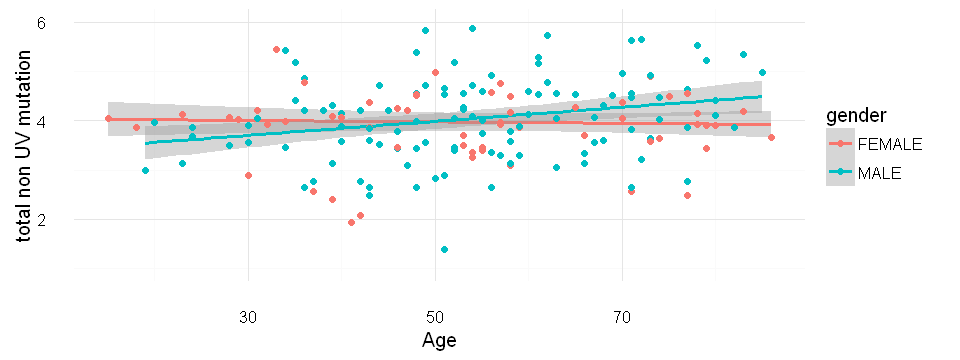

In [99]:
ggplot(data, aes(age_at_diagnosis, log(totalNonUV), color=gender)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("total non UV mutation") + scale_y_continuous(limits = c(1,6)) + theme_minimal()

Below is some statistical summary of this model.

In [100]:
res.new <- glm(totalNonUV ~ age_at_diagnosis + gender + body_area + rgeno + Cohort, data, family="poisson")
summary(res.new)


Call:
glm(formula = totalNonUV ~ age_at_diagnosis + gender + body_area + 
    rgeno + Cohort, family = "poisson", data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.883  -4.566  -1.881   2.375  24.296  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             3.4339866  0.0452479  75.893  < 2e-16 ***
age_at_diagnosis        0.0068841  0.0005967  11.537  < 2e-16 ***
genderMALE              0.4353014  0.0205959  21.135  < 2e-16 ***
body_areaHead and Neck  0.2843520  0.0327236   8.690  < 2e-16 ***
body_areaOther          0.0495295  0.1248553   0.397    0.692    
body_areaTrunk         -0.3745458  0.0208343 -17.977  < 2e-16 ***
rgenor,0               -0.0090947  0.0307773  -0.296    0.768    
rgenoR,0                0.2846325  0.0296858   9.588  < 2e-16 ***
rgenor,r                0.2009430  0.0370416   5.425  5.8e-08 ***
rgenoR,r                0.5013699  0.0309282  16.211  < 2e-16 ***
rgenoR,R                0.3

To a $\chi^2$ test on the deviance (a large value of this is good).

In [101]:
print=data.frame(data,pred=res.new$fitted)
print

,age_at_diagnosis,gender,body_area,tissue_type,Cohort,rgeno,sig1,sig5,sig7,totalNonUV,totalSNV,pred
1,74,FEMALE,Trunk,Primary Tumor,NRAS,"r,r",18.3776494782792,0,322.196392595928,38,339,58.043342340086
3,79,FEMALE,Extremities,Regional Lymph Node,NRAS,"0,0",22.2584700577615,21.2544285055765,1.97921350632214,31,54,71.4654013133931
5,53,FEMALE,Extremities,Regional Lymph Node,BRAF,"R,0",17.1398119764402,12.6008391567263,294.557531880051,41,325,59.3514696250036
6,60,MALE,Trunk,Regional Lymph Node,BRAF,"R,r",28.4435483877111,22.2570948225775,393.4877181373,62,452,82.200269001454
7,55,MALE,Extremities,regional (sub)cutaneous tissue,BRAF,"R,0",73.3174956798183,109.59299424803,822.201254851861,100,992,92.9950722730031
8,42,FEMALE,Trunk,Regional Lymph Node,BRAF,"0,0",14.5682279700173,0,104.809188052072,8,117,28.4620993992286
10,72,MALE,Extremities,Regional Lymph Node,BRAF,"R,R",11.2729222598709,19.3543152997275,3.0728541803615,25,38,109.767421919651
11,55,MALE,Extremities,Regional Lymph Node,BRAF,"0,0",71.50176999122,0,442.026711942066,55,529,69.9593263000619
14,67,MALE,Trunk,Regional Lymph Node,BRAF,"R,r",33.5730585202342,13.4881563422384,359.436909435098,35,409,86.2583907341923
15,48,MALE,Extremities,Regional Lymph Node,NRAS,"R,R",9.5313801245867,0,521.429563567985,54,523,124.527601048371


In [92]:
pchisq(res.new$deviance, res.new$df.residual, lower.tail=FALSE) 

[1] 0

To simplify things a bit, we repeat the same regression as above, restricted to NRAS samples and without any of the other covariates.

In [24]:
res.new.nras <- glm(totalNonUV ~ age_at_diagnosis, subset(data, Cohort="NRAS"), family="poisson")
summary(res.new.nras)


Call:
glm(formula = totalNonUV ~ age_at_diagnosis, family = "poisson", 
    data = subset(data, Cohort = "NRAS"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-10.685   -5.446   -2.036    1.425   26.614  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.8511866  0.0321189  119.90   <2e-16 ***
age_at_diagnosis 0.0085283  0.0005514   15.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 8189.7  on 171  degrees of freedom
Residual deviance: 7948.7  on 170  degrees of freedom
AIC: 8956.8

Number of Fisher Scoring iterations: 5


Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 11 rows containing missing values (geom_point)."

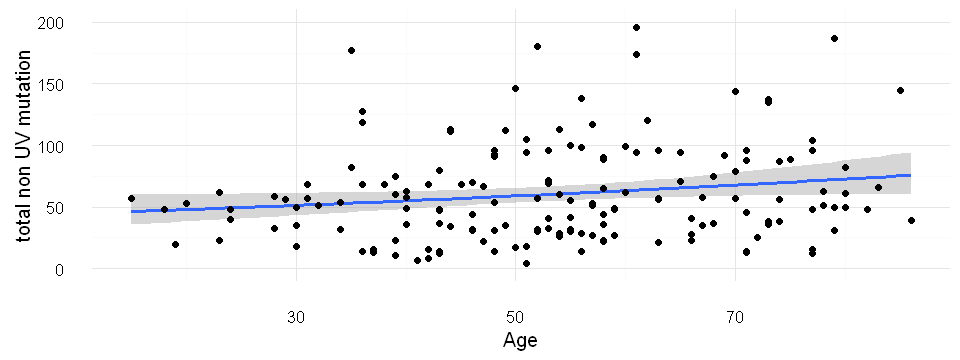

In [25]:
ggplot(data, aes(age_at_diagnosis, totalNonUV)) +  geom_smooth(method = "glm.nb") + geom_point() +
    xlab("Age") + ylab("total non UV mutation") + scale_y_continuous(limits = c(0,200)) + theme_minimal()

If we want to estimate the model as in [Podolskiy et al](http://www.nature.com/articles/ncomms12157), we would need to divide the data by age groups. We might not have enough samples for this to be meaningful (include other cancer types?) In any case, the plot looks as below.

In [26]:
data$range <- cut(data$age_at_diagnosis, c(0, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90), include.lowest=FALSE)

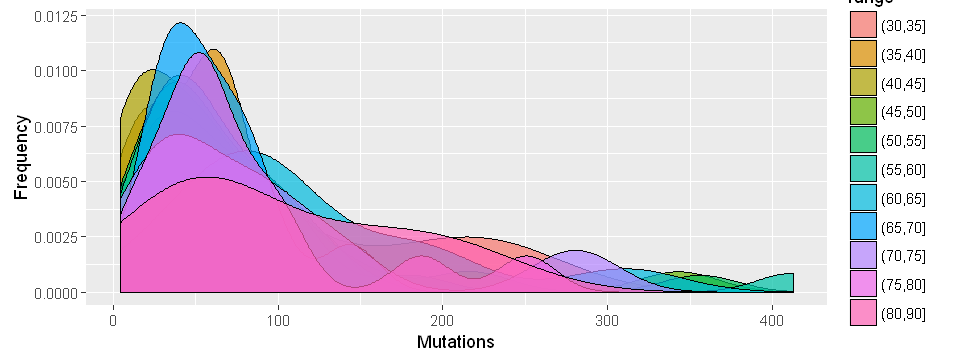

In [27]:
ggplot(subset(data, range != "(0,30]"), aes(x=totalNonUV, fill=range)) +
    geom_density(alpha=0.7) + xlab("Mutations") + ylab("Frequency")

**TODO** Record and plot the peaks of these curves.

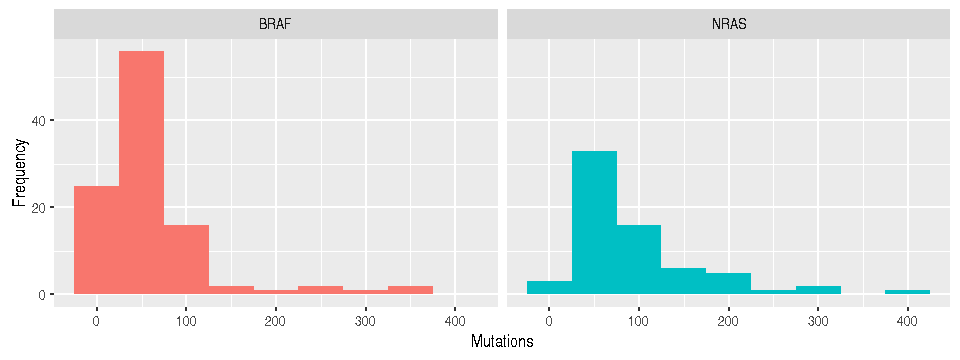

In [29]:
ggplot(subset(data, range="(50,60]"), aes(totalNonUV, fill=Cohort)) +
    geom_histogram(binwidth = 50, position="dodge") + guides(fill=FALSE) +
    facet_wrap(~ Cohort, ncol=2) + xlab("Mutations") + ylab("Frequency")

Again, restricted to this age range, the distribution looks Poisson-like with a longer tail. Before onset of the first driver mutation, the mutations seem to accumulate following a Poisson distribution. After onset, this is no longer correct, possibly accounting for the longer tails. Unfortunately, we don't seem to have enough data for a meaningful analysis within small age ranges.

### <font color="grey">  3.3 Branching processes</font>

I didn't get around to formalising this yet, but here one should include a principled derivation of a suitable model together with a solid procedure for estimating the parameters.

---
## <font color="grey">  4. Todo</font>
---

There are various things that need to be done.

These would require reading one or two piles of papers before proceeding.
* Look at more refined models for the accumulation of mutations. Examples include [Bozic et al](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004731), [Bozic et al](http://www.pnas.org/content/107/43/18545.abstract), [Keller and Antal](http://iopscience.iop.org/article/10.1088/1742-5468/2015/01/P01011/meta), [Paterson, Nowak and Waclaw](http://www.nature.com/articles/srep39511as), as well as related work from the group of [Martin Nowak](http://ped.fas.harvard.edu/).
* Look at material on the proliferation of cells in order to deduce some conclusions from the estimated cell division rates. Possible sources to look at include in [Cichorek et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3834696/), [Whiteman et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3395885/), [Zabierowski et al](https://www.ncbi.nlm.nih.gov/pubmed/21410654), [Hoek and Goding](https://www.ncbi.nlm.nih.gov/pubmed/20726948), and [Schatton and Frank](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885609/). 
* Double wild types
* Wu / hits. NRAS requires more hits?